## Import libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
df=pd.read_csv("C:\\Users\mounika\Downloads\Restaurant_revenue (1).csv")

In [4]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [5]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [6]:
df.tail()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204
999,81,34.722067,17.989104,Italian,15.482112,1,72,379.973072


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [8]:
df.shape

(1000, 8)

In [9]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [10]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [11]:
data = df.drop(['Cuisine_Type','Promotions'],axis=1)
data.head(10)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,36.236133,45,350.912040
1,24,40.020077,4.577892,17.952562,36,221.319091
2,81,41.981485,4.652911,22.600420,91,326.529763
3,70,43.005307,4.416053,18.984098,59,348.190573
4,30,17.456199,3.475052,12.766143,30,185.009121
5,92,19.427670,13.114473,43.099950,10,399.867507
6,96,35.350343,16.960318,20.181622,86,496.653687
7,84,46.314645,14.486349,28.921100,1,417.158607
8,84,22.647863,15.841873,11.732611,26,352.148065
9,97,33.532267,8.095969,37.973579,98,272.793517


In [12]:
df.dtypes

Number_of_Customers            int64
Menu_Price                   float64
Marketing_Spend              float64
Cuisine_Type                  object
Average_Customer_Spending    float64
Promotions                     int64
Reviews                        int64
Monthly_Revenue              float64
dtype: object

## Data Processing

In [13]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Cuisine_Type'], drop_first=True)


In [14]:
# Feature Scaling (Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews']] = scaler.fit_transform(df[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews']])

## Model Selection

In [15]:
# Select a Model (Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()


## Model Training

In [16]:
# Split the Data
from sklearn.model_selection import train_test_split
X = df.drop('Monthly_Revenue', axis=1)
y = df['Monthly_Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

In [17]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 3560.4388349737933
R-squared: 0.6740626407300359


## Model Interpretation and Visualization


Feature Importance:
                     Feature  Coefficient
0        Number_of_Customers    76.658063
1                 Menu_Price    23.362615
2            Marketing_Spend    29.328227
3  Average_Customer_Spending    -2.057506
4                 Promotions    -2.243819
5                    Reviews    -0.452555
6       Cuisine_Type_Italian    -1.307481
7      Cuisine_Type_Japanese     0.451322
8       Cuisine_Type_Mexican     3.053016


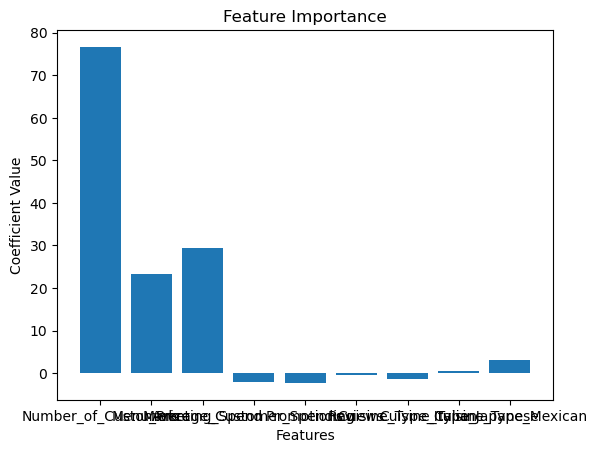

In [18]:
# Feature Importance (Coefficients in Linear Regression)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Importance:")
print(coefficients)

# Visualization (Optional)
import matplotlib.pyplot as plt
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


## Visualizations

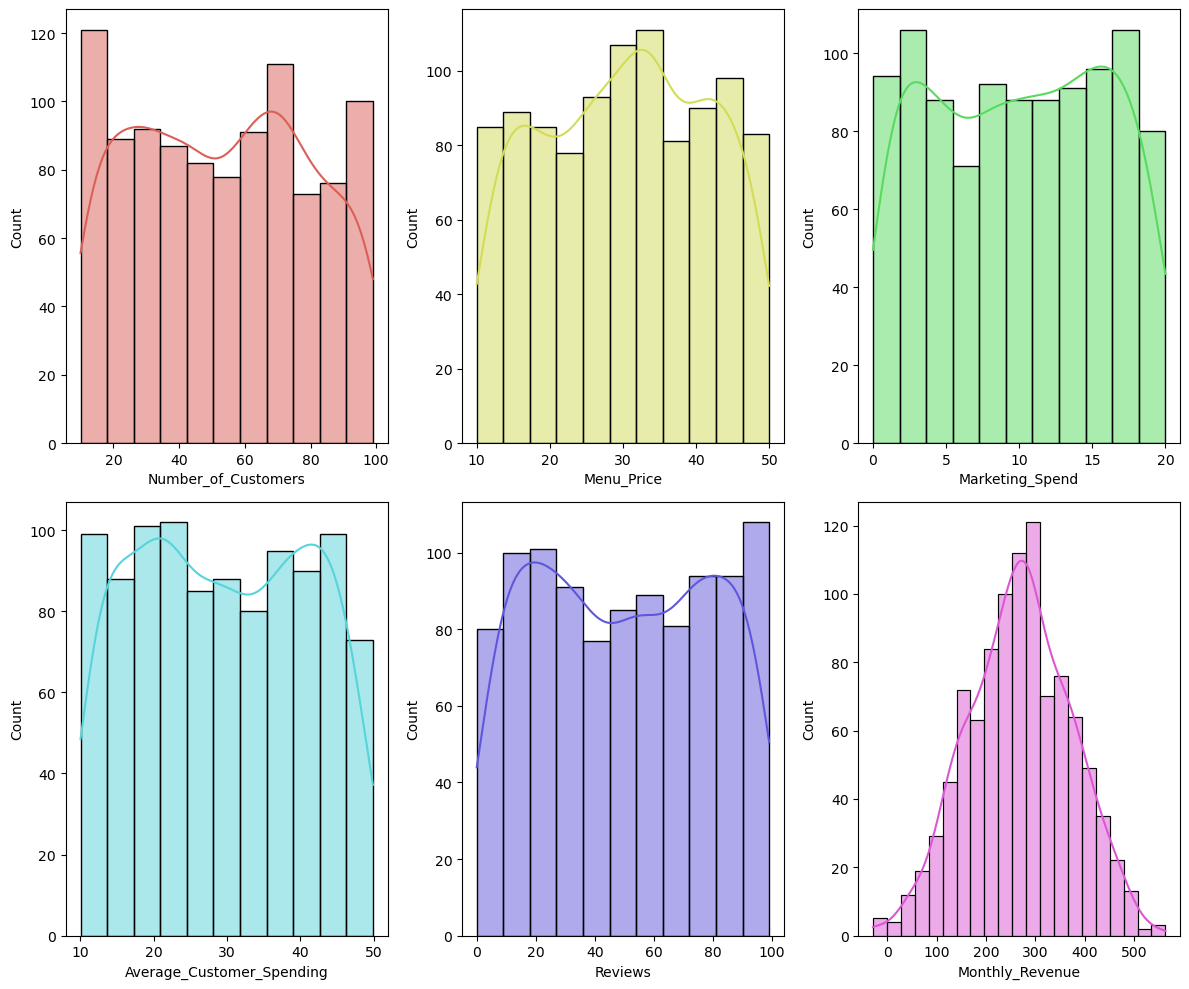

In [20]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
color = sns.color_palette("hls", len(data.columns))
axis = axis.flat 

for i, col in enumerate(data.columns):
    sns.histplot(data, x=col, ax=axis[i],color = color[i],fill=True,kde=True)
plt.tight_layout()
plt.show()

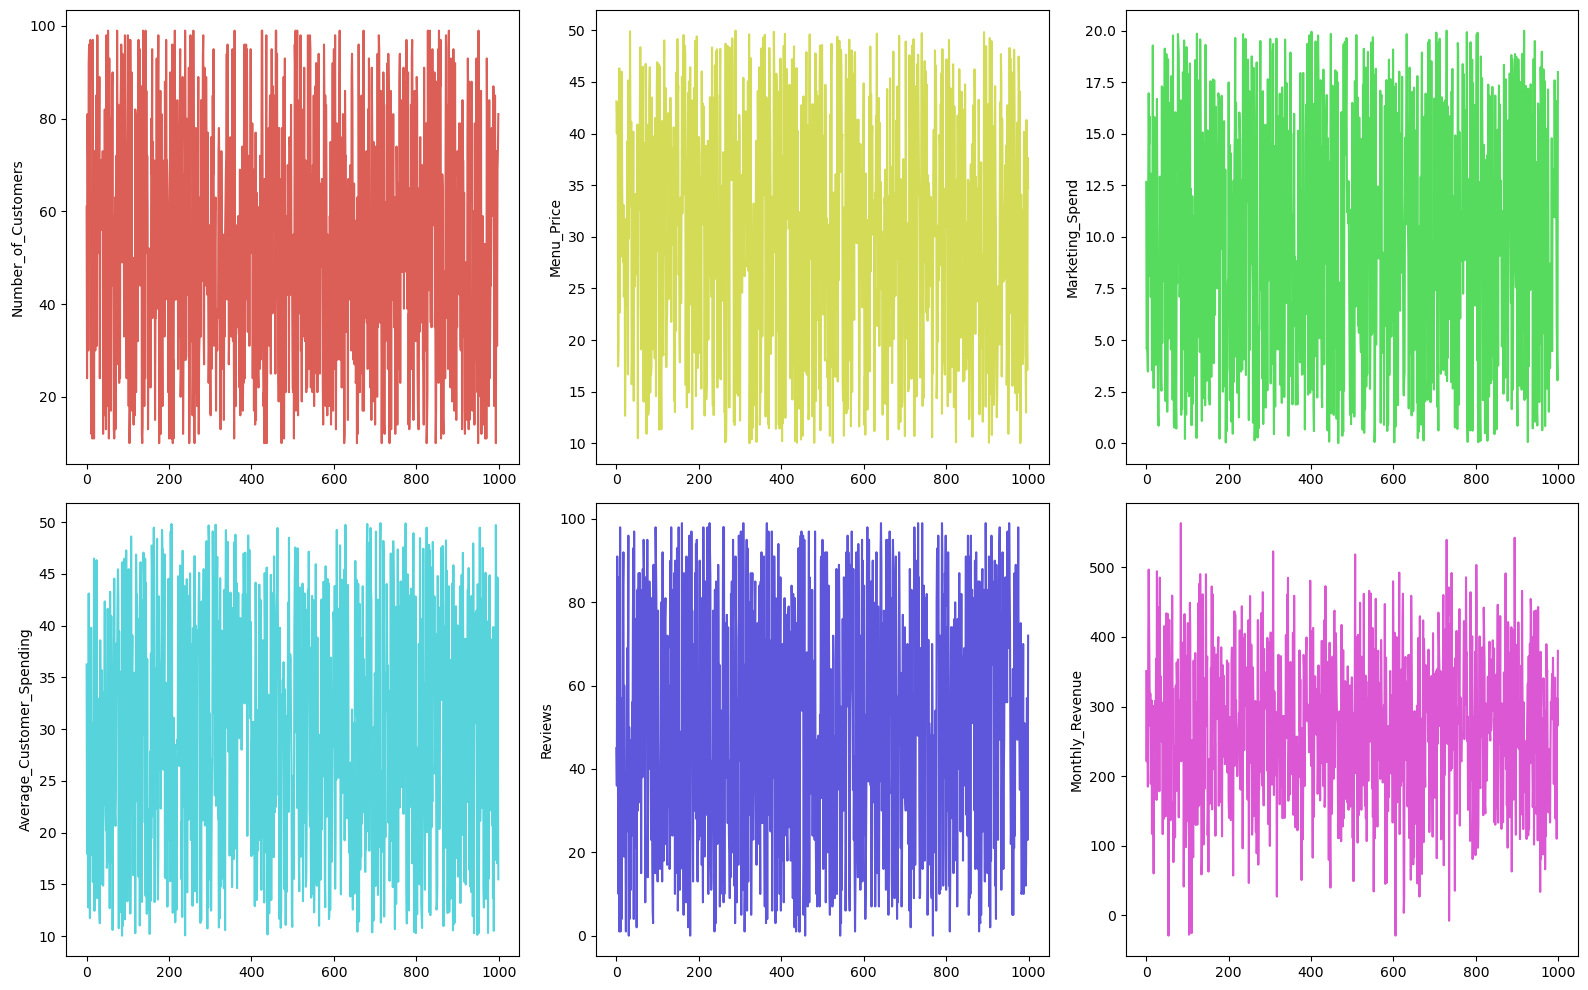

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
color = sns.color_palette("hls", len(data.columns))
axis = axis.flat 

for i, col in enumerate(data.columns):
    sns.lineplot(data=data, x=data.index, y=col, ax=axis[i], color=color[i])

plt.tight_layout()
plt.show()

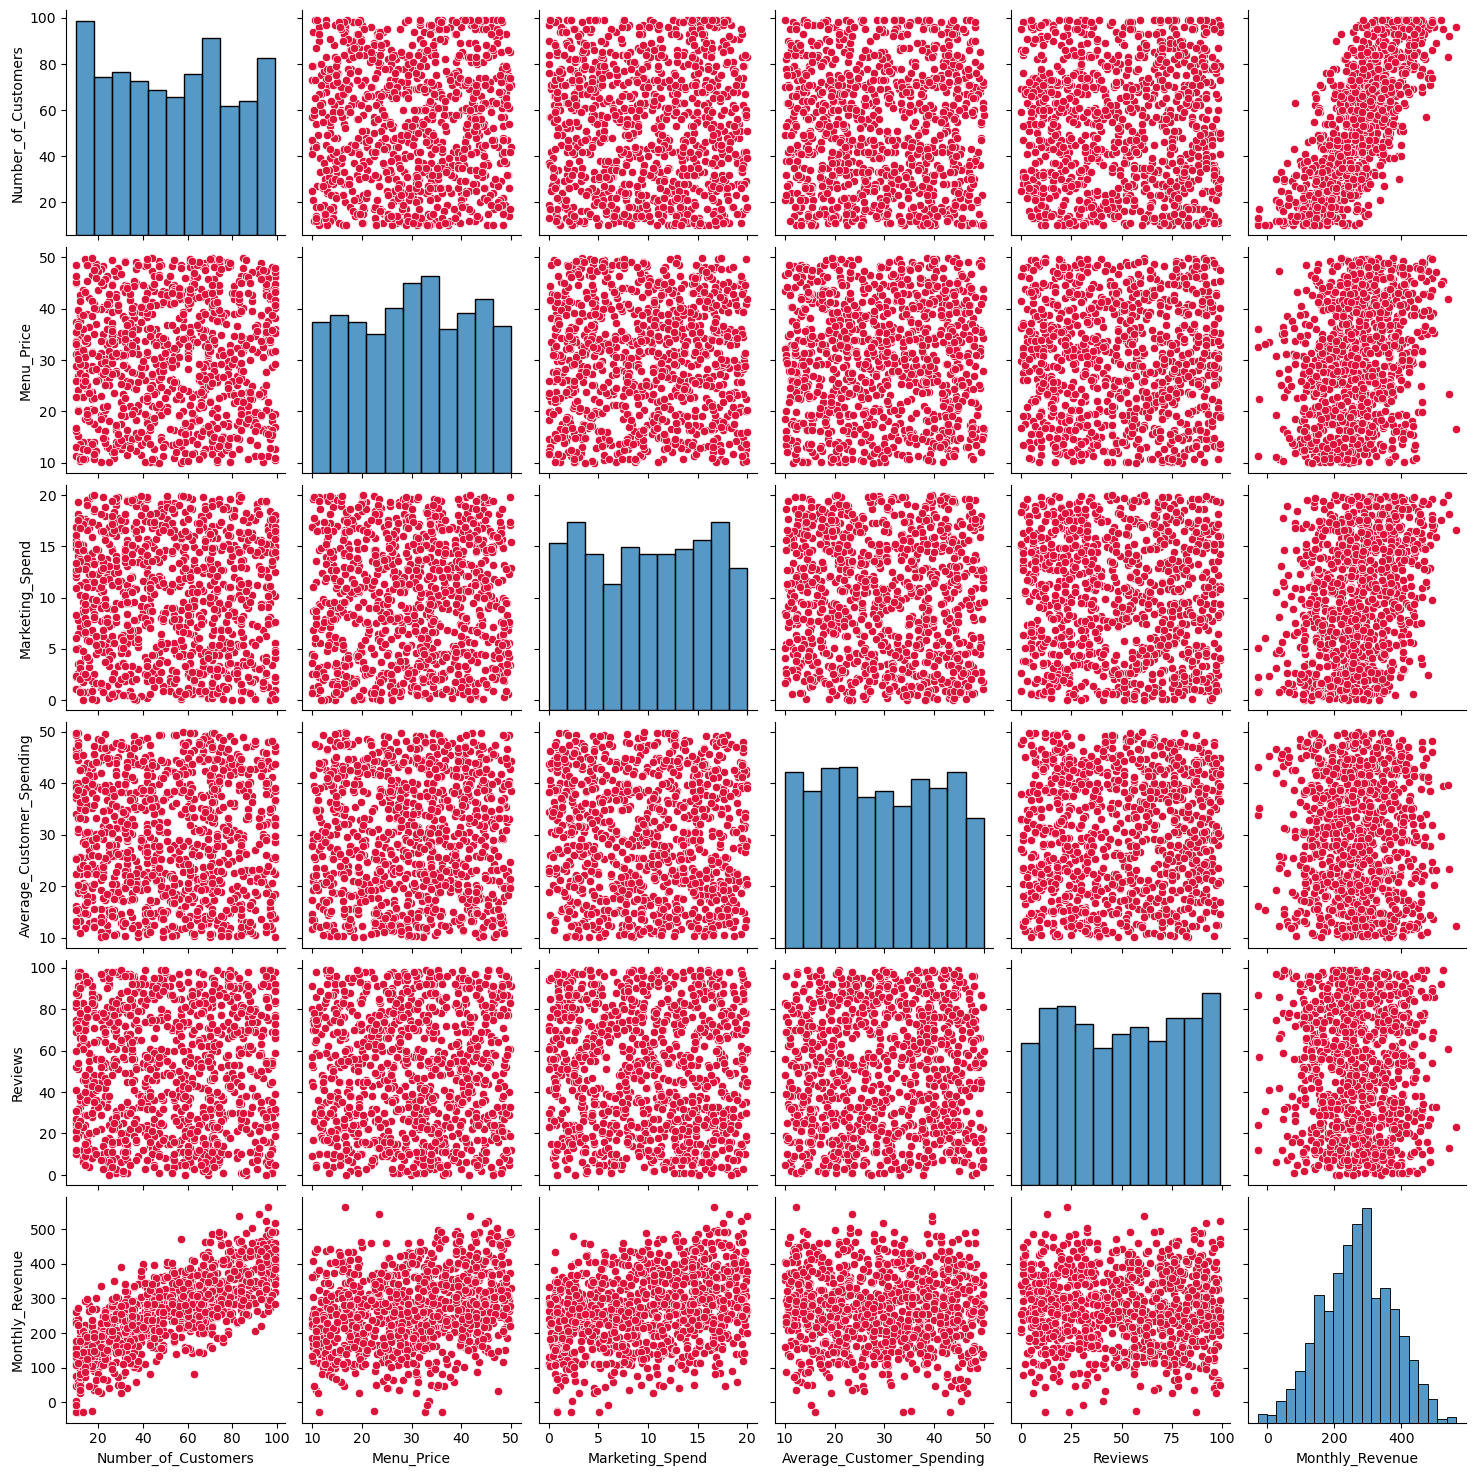

In [22]:
sns.pairplot(data, plot_kws = {'color':'crimson'})
plt.show()

In [26]:
# Display the column names
print(df.columns)


Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
       'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue',
       'Cuisine_Type_Italian', 'Cuisine_Type_Japanese',
       'Cuisine_Type_Mexican'],
      dtype='object')


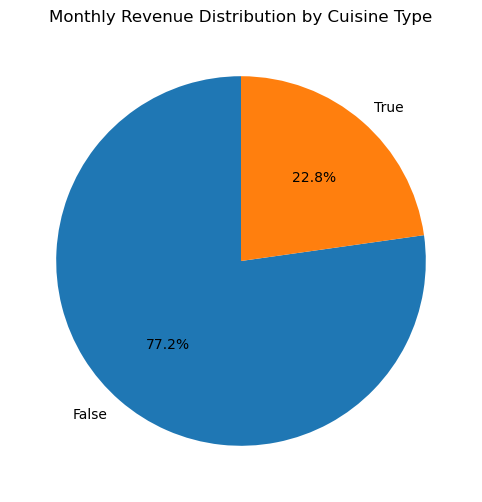

In [27]:
import matplotlib.pyplot as plt

# Group by Cuisine_Type and calculate the sum of Monthly_Revenue for each cuisine
cuisine_revenue = df.groupby('Cuisine_Type_Italian')['Monthly_Revenue'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(cuisine_revenue['Monthly_Revenue'], labels=cuisine_revenue['Cuisine_Type_Italian'], autopct='%1.1f%%', startangle=90)
plt.title('Monthly Revenue Distribution by Cuisine Type')
plt.show()


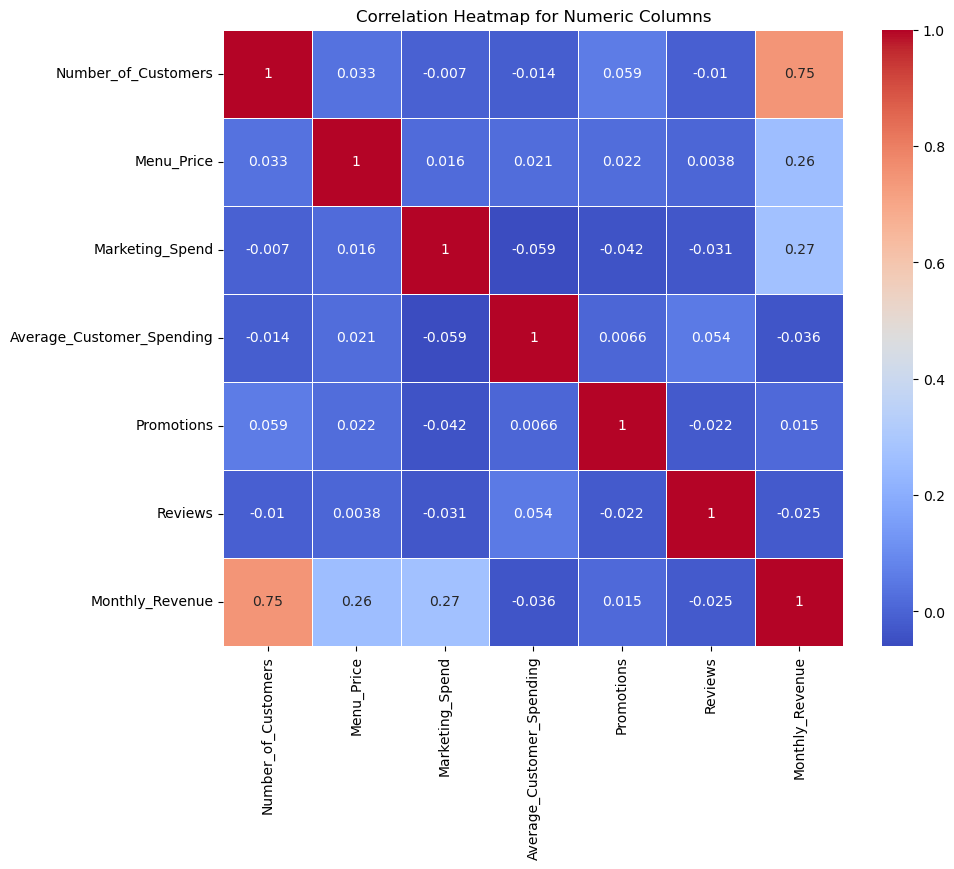

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


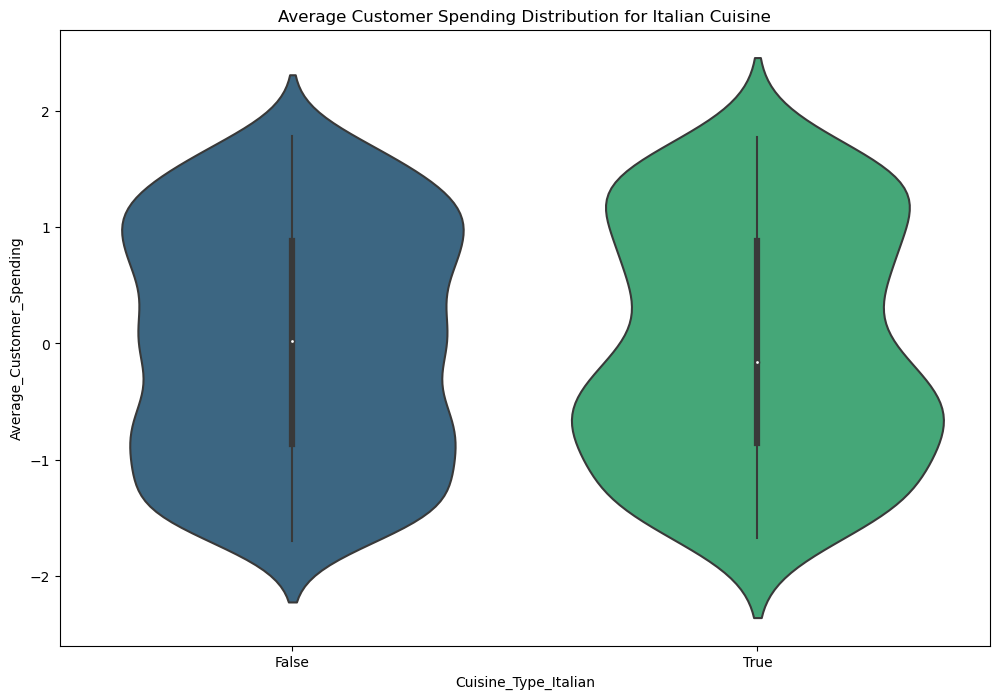

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.violinplot(x='Cuisine_Type_Italian', y='Average_Customer_Spending', data=df, palette='viridis')
plt.title('Average Customer Spending Distribution for Italian Cuisine')
plt.show()


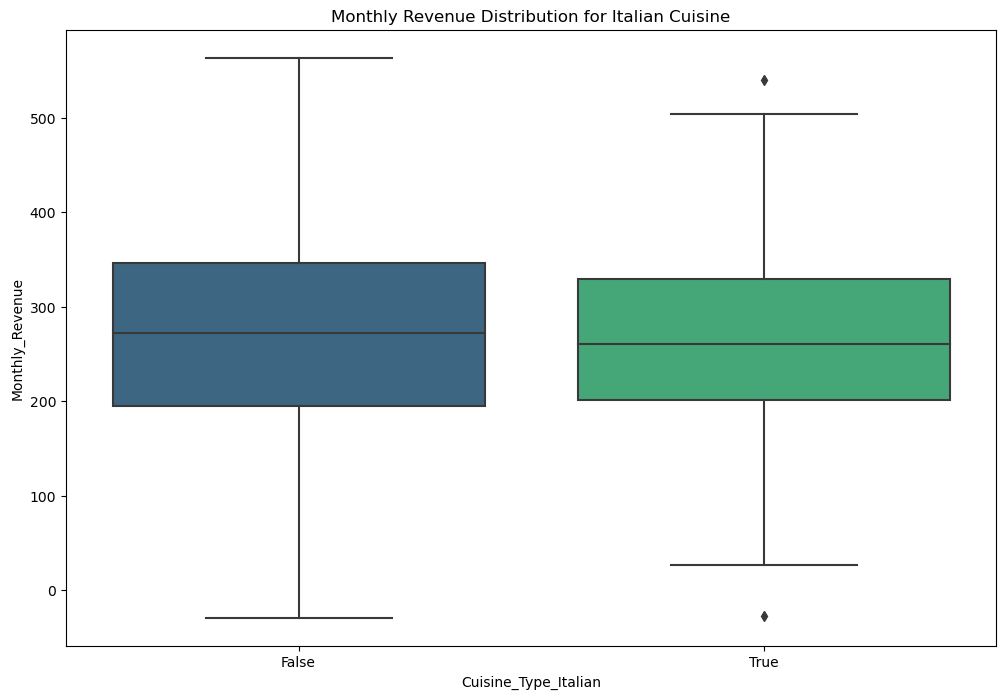

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cuisine_Type_Italian', y='Monthly_Revenue', data=df, palette='viridis')
plt.title('Monthly Revenue Distribution for Italian Cuisine')
plt.show()


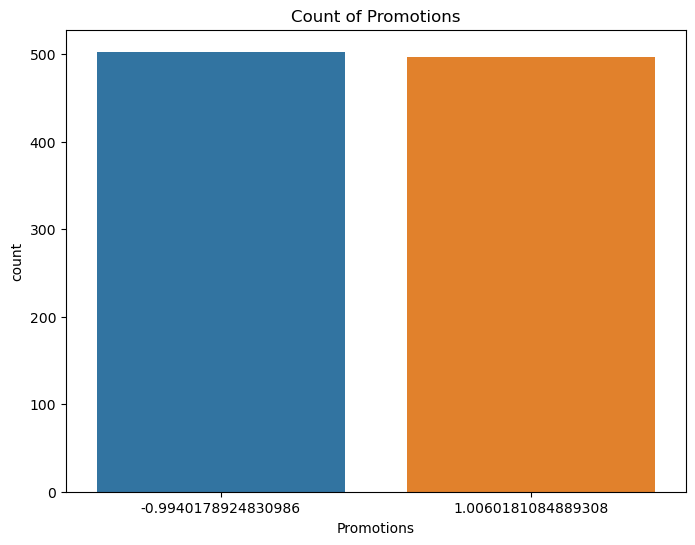

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Promotions', data=df)
plt.title('Count of Promotions')
plt.show()
